In [1]:
import os, sys
import numpy as np
import torch
sys.path.append('script')
from Synthesis import init_LocalTransform, predict_product

dataset = 'USPTO_480k' # get the info of derived templates
scenario = 'mix' # 'sep' or 'mix'

model_name = 'LocalTransform_%s' % scenario
device = torch.device('cuda:0')
model_path = 'models/%s.pth' % model_name
config_path = 'data/configs/default_config'
data_dir = 'data/%s' % dataset

args = {'data_dir': data_dir, 'model_path': model_path, 'config_path': config_path, 'device': device, 'mode': 'test'}
model, graph_functions, template_dicts, template_infos = init_LocalTransform(args)
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print ('# model parameters: %.2fM' % (params/1000000))

Using backend: pytorch
/home/shuanchen/anaconda3/envs/rdenv/lib/python3.6/site-packages/dgl/base.py:45: DGLWarning: Detected an old version of PyTorch. Suggest using torch>=1.5.0 for the best experience.
  return warnings.warn(message, category=category, stacklevel=1)


Parameters of loaded LocalTransform:
{'attention_heads': 8, 'attention_layers': 3, 'edge_hidden_feats': 32, 'node_out_feats': 256, 'num_step_message_passing': 3, 'Template_rn': 4540, 'Template_vn': 2635, 'in_node_feats': 80, 'in_edge_feats': 13}
loaded 4540 real templates
loaded 2635 virtual templates
# model parameters: 13.49M


0th prediction: [A:1].[A:2]-[A:3]>>[A:1]-[A:2] B [8, 9] 0.9674548 -10 00
1th prediction: [A:1].[A:2]-[A:3]>>[A:1]-[A:2] A [3, 8] 0.95920646 -10 00
2th prediction: [A:1]-[A:3].[A:2]-[A:4]>>[A:1]-[A:2] A [8, 3] 0.027039105 00 00
3th prediction: [A:1].[A:3]-[A:2]=[A:4]>>[A:1]-[A:2] B [8, 7] 0.026825659 -12 00
4th prediction: [A:1]-[A:3].[A:2]-[A:4]>>[A:1]-[A:2] B [3, 2] 0.017053712 00 00
5th prediction: [A:1].[A:3]-[A:2]=[A:4]>>[A:1]-[A:2] A [3, 8] 0.00934756 -12 00
6th prediction: [A:1].[A:3]-[A:2]=[A:4]>>[A:1]-[A:2] B [8, 9] 0.00792203 -12 00
7th prediction: [A:1]-[A:3].[A:2]>>[A:1].[A:2]-[A:3] B [8, 9] 0.0065396186 1-10 000
8th prediction: [A:1]-[A:3].[A:2]>>[A:1].[A:2]-[A:3] B [9, 8] 0.005654831 1-10 000
9th prediction: [A:1]-[A:3].[A:2]-[A:4]>>[A:1]-[A:2] A [3, 8] 0.005192242 00 00
10th prediction: [A:1]-[A:3].[A:2]-[A:4]>>[A:1]-[A:2] A [8, 2] 0.00510601 00 00
11th prediction: [A:1]-[A:3].[A:2]>>[A:1].[A:2]-[A:3] A [3, 8] 0.004984453 1-10 000
12th prediction: [A:1]-[A:3].[A:2]-[A:4]>

,SMILES,Edition,Score,Molecule
0,CCCN.ClCCl.O=C(Cl)c1ccccc1,None,NaN,
1,CCCNC(=O)c1ccccc1,{'template': '([N:1]).([C:2]-[Cl:3])>>([N:1]-[...,0.963331,
2,NCCCC(=O)c1ccccc1,{'template': '([C:1]).([C:2]-[Cl:3])>>([C:1]-[...,0.485165,
3,CCCNCc1ccccc1,{'template': '([N:1]).([Cl:3]-[C:2]=[O:4])>>([...,0.014698,
4,NC(=O)c1ccccc1,{'template': '([N:1]-[C:3]).([C:2]-[Cl:4])>>([...,0.013429,
5,Cl,{'template': '([N:2]).([Cl:1]-[C:3])>>([Cl:1]....,0.005726,

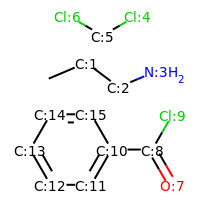
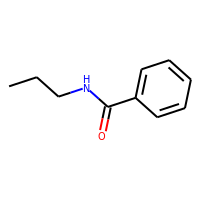
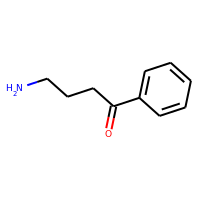
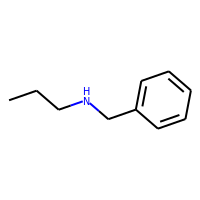
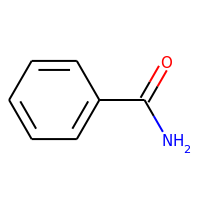
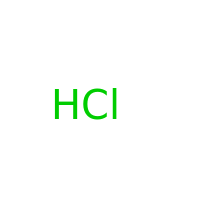

In [2]:
# Simple reaction outcome prediction
reactants = 'CCCN.ClCCl.O=C(Cl)c1ccccc1'
sep = False
verbose = 1
results, attentions = predict_product(reactants, model, graph_functions, device, template_dicts, template_infos, verbose = verbose, sep = sep)
results

In [3]:
# Human benchmark
import pandas as pd
extra = 'data/Human_benchmark/human.csv'
extra = pd.read_csv(extra)
rxns = extra['Reaction smiles']

,SMILES,Edition,Score,Correct,Molecule
0,[Br:26][CH2:27][C:28]([C:29](=[O:30])[O:31][CH...,None,NaN,None,
1,CCOC(=O)C(=O)C[n+]1c(N)c(Cl)nc2ccccc21,{'template': '([Br:1]-[C:3]).([n:2])>>([Br:1]....,0.165530,True,
2,CCOC(=O)C(=O)C[n+]1c(Cl)c(Cl)nc2ccccc21,{'template': '([Br:1]-[C:3]).([n:2])>>([Br:1]....,0.109651,False,

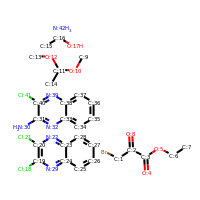
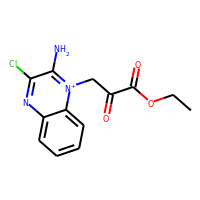
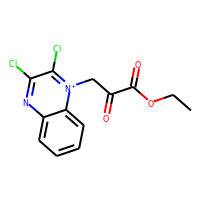

In [12]:
test_id = 80 # wrong_ids: 14, 44, 61, 68, 76
rxn = rxns[test_id-1]
reactants, product = rxn.split('>>')
results, attentions = predict_product(reactants, model, graph_functions, device, template_dicts, template_infos, product = product, top_k = 1, verbose = 0)
results

In [15]:
reactants

'[Br:26][CH2:27][C:28]([C:29](=[O:30])[O:31][CH2:32][CH3:33])=[O:34].[CH3:35][O:36][CH:37]([O:38][CH3:39])[CH3:40].[CH3:41][CH2:42][OH:43].[Cl:13][c:14]1[c:15]([Cl:16])[n:17][c:18]2[c:19]([cH:20][cH:21][cH:22][cH:23]2)[n:24]1.[NH2:1][c:2]1[n:3][c:4]2[cH:5][cH:6][cH:7][cH:8][c:9]2[n:10][c:11]1[Cl:12].[NH3:25]'